In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [193]:
df = pd.read_csv("games.csv")
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,Unnamed: 14
0,11190,Sherlock Holmes versus Jack the Ripper,12/23/2009,TRUE,False,False,Mostly Positive,78,792,9.99,9.99,9.99,0.0,TRUE,NaN
1,20700,Starscape,11/3/2008,TRUE,False,False,Very Positive,81,80,7.99,7.99,7.99,0.0,TRUE,NaN
2,94202,"Jamestown: Gunpowder, Treason, & Plot",11/10/2011,TRUE,True,False,Positive,90,10,2.99,2.99,2.99,0.0,TRUE,NaN
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,2/26/2013,TRUE,False,False,Mixed,60,10,9.99,9.99,9.99,0.0,TRUE,NaN
4,222520,Champions of Regnum,2/27/2013,TRUE,True,True,Mixed,67,1098,0.00,0.00,0.00,0.0,TRUE,NaN


In [194]:
df.shape

(13471, 15)

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13471 entries, 0 to 13470
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13471 non-null  int64  
 1   title             13471 non-null  object 
 2   date_release      13471 non-null  object 
 3   win               13471 non-null  object 
 4   mac               13471 non-null  bool   
 5   linux             13471 non-null  bool   
 6   rating            13471 non-null  object 
 7   positive_ratio    13471 non-null  object 
 8   user_reviews      13471 non-null  int64  
 9   price_final       13471 non-null  float64
 10  price_original    13445 non-null  float64
 11  price_discounted  13445 non-null  float64
 12  discount          13471 non-null  float64
 13  steam_deck        13471 non-null  object 
 14  Unnamed: 14       2 non-null      object 
dtypes: bool(2), float64(4), int64(2), object(7)
memory usage: 1.4+ MB


In [196]:
df.win = df.win.apply(lambda x : 1 if x == "TRUE" else 0)

In [197]:
df.win

0        1
1        1
2        1
3        1
4        1
        ..
13466    1
13467    0
13468    1
13469    1
13470    1
Name: win, Length: 13471, dtype: int64

In [198]:
df.mac = df.mac.apply(lambda x : 0 if x == False else 1)

In [199]:
df.mac

0        0
1        0
2        1
3        0
4        1
        ..
13466    0
13467    0
13468    0
13469    0
13470    0
Name: mac, Length: 13471, dtype: int64

In [200]:
df.linux = df.linux.apply(lambda x : 0 if x == False else 1)
df.linux

0        0
1        0
2        0
3        0
4        1
        ..
13466    0
13467    0
13468    0
13469    0
13470    0
Name: linux, Length: 13471, dtype: int64

In [201]:
df.rating.unique()

array(['Mostly Positive', 'Very Positive', 'Positive', 'Mixed',
       'Overwhelmingly Positive', 'Mostly Negative', 'FALSE'],
      dtype=object)

In [202]:
df.rating.value_counts()

Positive                   5418
Very Positive              3892
Mostly Positive            2224
Mixed                      1718
Overwhelmingly Positive     210
Mostly Negative               7
FALSE                         2
Name: rating, dtype: int64

In [203]:
df.groupby("title")["rating"].value_counts().nlargest(2)

title                                                                   rating         
Atelier Ryza 2: Lost Legends & the Secret Fairy Digital Deluxe Edition  Very Positive      2
Champs TD                                                               Mostly Positive    2
Name: rating, dtype: int64

In [204]:
df1 = df[df.rating == "Mostly Positive"]

In [205]:
df = df.drop([df.index[5967], df.index[8659]])

In [206]:
df.positive_ratio = df["positive_ratio"].astype(int)

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13469 entries, 0 to 13470
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   app_id            13469 non-null  int64  
 1   title             13469 non-null  object 
 2   date_release      13469 non-null  object 
 3   win               13469 non-null  int64  
 4   mac               13469 non-null  int64  
 5   linux             13469 non-null  int64  
 6   rating            13469 non-null  object 
 7   positive_ratio    13469 non-null  int32  
 8   user_reviews      13469 non-null  int64  
 9   price_final       13469 non-null  float64
 10  price_original    13443 non-null  float64
 11  price_discounted  13443 non-null  float64
 12  discount          13469 non-null  float64
 13  steam_deck        13469 non-null  object 
 14  Unnamed: 14       0 non-null      object 
dtypes: float64(4), int32(1), int64(5), object(5)
memory usage: 1.6+ MB


In [208]:
df.positive_ratio.max()

100

In [209]:
df[df["positive_ratio"] == 100].shape

(1367, 15)

In [210]:
df[df["price_original"] == 199.99]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,Unnamed: 14
4219,2235780,Hidden Post-Apocalyptic 3 Top-Down 3D,12/17/2022,1,1,1,Mostly Positive,75,16,19.99,199.99,19.99,90.0,TRUE,NaN


In [211]:
df.discount.max()

90.0

In [212]:
df[df.discount == 90.0].shape

(209, 15)

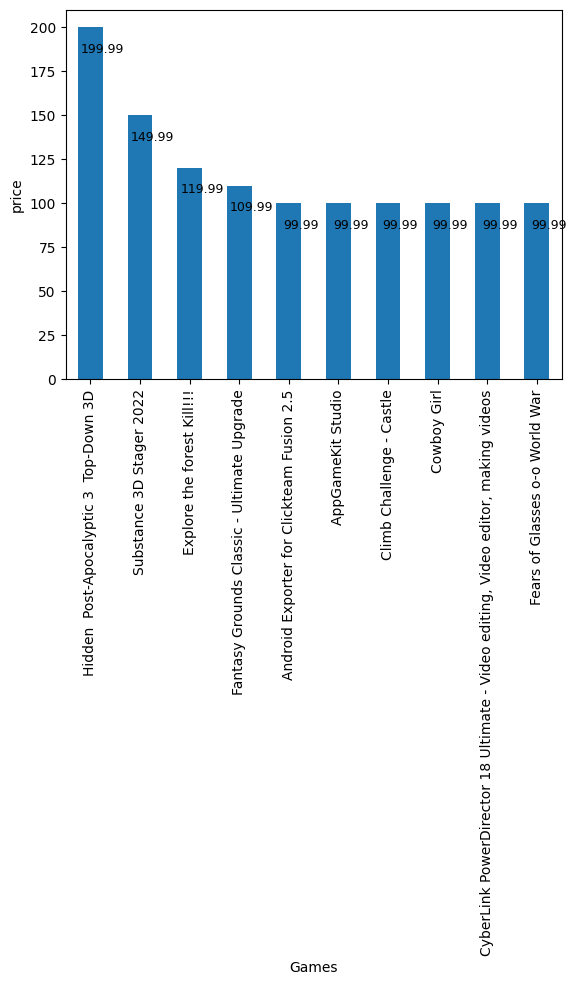

In [270]:
data = df.groupby("title")["price_original"].max().nlargest(10).plot.bar()
plt.xlabel("Games")
plt.ylabel("price")
for i in data.patches:
    data.annotate(f'\n{i.get_height()}', (i.get_x()+0.5, i.get_height()), ha = "center", va = "top", size = 9, color = "black")

In [214]:
df.columns


Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'price_discounted', 'discount', 'steam_deck', 'Unnamed: 14'],
      dtype='object')

In [215]:
df = df[~df.price_discounted.isnull()]

In [216]:
df.isnull().sum()

app_id                  0
title                   0
date_release            0
win                     0
mac                     0
linux                   0
rating                  0
positive_ratio          0
user_reviews            0
price_final             0
price_original          0
price_discounted        0
discount                0
steam_deck              0
Unnamed: 14         13443
dtype: int64

In [217]:
df.date_release.info()

<class 'pandas.core.series.Series'>
Int64Index: 13443 entries, 0 to 13470
Series name: date_release
Non-Null Count  Dtype 
--------------  ----- 
13443 non-null  object
dtypes: object(1)
memory usage: 210.0+ KB


In [218]:
df.date_release = pd.to_datetime(df.date_release)

In [219]:
df["day"] = df.date_release.dt.day

In [220]:
df["month"] = df.date_release.dt.month

In [221]:
df["year"] = df.date_release.dt.year

In [222]:
df = df.drop("date_release",axis=1)

In [245]:
df.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,price_discounted,discount,steam_deck,Unnamed: 14,day,month,year
0,11190,Sherlock Holmes versus Jack the Ripper,1,0,0,Mostly Positive,78,792,9.99,9.99,9.99,0.0,0,NaN,23,12,2009
1,20700,Starscape,1,0,0,Very Positive,81,80,7.99,7.99,7.99,0.0,0,NaN,3,11,2008
2,94202,"Jamestown: Gunpowder, Treason, & Plot",1,1,0,Positive,90,10,2.99,2.99,2.99,0.0,0,NaN,10,11,2011
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,1,0,0,Mixed,60,10,9.99,9.99,9.99,0.0,0,NaN,26,2,2013
4,222520,Champions of Regnum,1,1,1,Mixed,67,1098,0.00,0.00,0.00,0.0,0,NaN,27,2,2013


In [246]:
df.steam_deck = df.steam_deck.apply(lambda x : 1 if x == "TRUE" else 0)

In [247]:
x = df.drop(["price_original","Unnamed: 14"],axis=1)

In [248]:
y = df["price_original"]

In [249]:
x.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_discounted,discount,steam_deck,day,month,year
0,11190,Sherlock Holmes versus Jack the Ripper,1,0,0,Mostly Positive,78,792,9.99,9.99,0.0,0,23,12,2009
1,20700,Starscape,1,0,0,Very Positive,81,80,7.99,7.99,0.0,0,3,11,2008
2,94202,"Jamestown: Gunpowder, Treason, & Plot",1,1,0,Positive,90,10,2.99,2.99,0.0,0,10,11,2011
3,212673,Tom Clancy's Ghost Recon Future Soldier® - Khy...,1,0,0,Mixed,60,10,9.99,9.99,0.0,0,26,2,2013
4,222520,Champions of Regnum,1,1,1,Mixed,67,1098,0.00,0.00,0.0,0,27,2,2013


In [250]:
y.head()

0    9.99
1    7.99
2    2.99
3    9.99
4    0.00
Name: price_original, dtype: float64

In [251]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

In [252]:
xtest.shape

(4033, 15)

In [253]:
xtrain.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_discounted,discount,steam_deck,day,month,year
5869,907881,LET IT DIE -Platinum Pack-,1,0,0,Mostly Positive,73,15,49.99,49.99,0.0,0,26,9,2018
5597,1004990,DiRT Rally 2.0 - Porsche 911 SC RS,1,0,0,Mostly Positive,72,18,1.99,1.99,0.0,0,1,7,2019
13092,938220,TAPSONIC BOLD,1,0,0,Mostly Positive,74,1101,19.99,19.99,0.0,0,29,3,2019
3044,1815930,Ruined King: A League of Legends Story™ - Mana...,1,0,0,Mixed,60,28,1.99,1.99,0.0,0,16,11,2021
12087,1705150,SKULL CHAINZ,1,0,0,Positive,96,26,9.99,9.99,0.0,0,30,10,2022


In [254]:
xtrain.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_discounted,discount,steam_deck,day,month,year
5869,907881,LET IT DIE -Platinum Pack-,1,0,0,Mostly Positive,73,15,49.99,49.99,0.0,0,26,9,2018
5597,1004990,DiRT Rally 2.0 - Porsche 911 SC RS,1,0,0,Mostly Positive,72,18,1.99,1.99,0.0,0,1,7,2019
13092,938220,TAPSONIC BOLD,1,0,0,Mostly Positive,74,1101,19.99,19.99,0.0,0,29,3,2019
3044,1815930,Ruined King: A League of Legends Story™ - Mana...,1,0,0,Mixed,60,28,1.99,1.99,0.0,0,16,11,2021
12087,1705150,SKULL CHAINZ,1,0,0,Positive,96,26,9.99,9.99,0.0,0,30,10,2022


In [255]:
from sklearn.preprocessing import LabelEncoder

In [256]:
enc = LabelEncoder()

xtrain['title'] = enc.fit_transform(xtrain['title'])
xtest['title'] = enc.fit_transform(xtest['title'])

xtrain['rating'] = enc.fit_transform(xtrain['rating'])
xtest['rating'] = enc.fit_transform(xtest['rating'])




In [257]:
xtest.head()

,app_id,title,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_discounted,discount,steam_deck,day,month,year
4171,631830,2839,1,0,0,2,71,213,0.66,0.66,33.0,0,5,4,2018
2325,1490490,1753,1,0,0,4,100,34,0.59,0.59,40.0,0,8,4,2021
1067,938310,14,1,1,0,5,96,108,2.99,2.99,0.0,0,26,12,2018
7015,1276750,2215,1,1,0,5,94,73,14.99,14.99,0.0,0,13,10,2021
8370,769950,2402,1,0,0,0,64,430,29.99,29.99,0.0,0,31,8,2018


In [258]:
df.rating.unique()

array(['Mostly Positive', 'Very Positive', 'Positive', 'Mixed',
       'Overwhelmingly Positive', 'Mostly Negative'], dtype=object)

In [261]:
rid = Ridge(alpha = 0.5)

In [262]:
rid.fit(xtrain,ytrain)

Ridge(alpha=0.5)

In [264]:
model = rid.predict(xtest)

In [267]:
model1 = pd.DataFrame({"Actual_value":ytest,"predict_values":model})

In [269]:
model1.head(10)

,Actual_value,predict_values
4171,0.99,3.218833
2325,0.99,3.786194
1067,2.99,2.934430
7015,14.99,15.176314
8370,29.99,30.467047
11575,0.99,6.206497
5990,14.99,15.134552
1316,2.99,2.819389
4369,0.00,-0.207991
1772,19.99,11.297143
